In [1]:
from numpy import *
from matplotlib import *
from pylab import *
import pandas as pd
from matplotlib.colors import ListedColormap
import sympy as sp

In [2]:
def XS(v0,g,g1,gamma):
    x=sqrt(2.0)*(gamma/g1)
    return x

def BS(v0,g,g1,gamma):
    b=-gamma/4.0
    return b

In [3]:
def jacobian(x,y,b,v0,g,g1,gamma):
    
    J11=2*(gamma-b)-(5*g1*x)/sqrt(2)
    J12=0
    J13=-2*x
    
    J21=g1*y/sqrt(2)
    J22=4*b+g1*x/sqrt(2)
    J23=4*y

    J31=g/(y*2*sqrt(2))
    J32=-1/(y*y*y)-(g*x)/(2*sqrt(2)*y*y)-(y*v0*v0)*(45/2.0)
    #J32=-1/(y*y*y)-(g*x)/(2*sqrt(2)*y*y)
    J33=-4*b
    
    J = array([
        [J11,J12,J13], 
        [J21,J22,J23],  
        [J31,J32,J33]  
            ])
    return J

In [4]:
 def is_stable(x,y,b,v0,g,g1, gamma):
    J = jacobian(x,y,b,v0,g,g1, gamma)
    eigenvalues = linalg.eigvals(J)
    return all(real(eigenvalues) < 0)
     
    #return eigenvalues

In [5]:
gamma_vals = logspace(-5, 0, 100)
g1_vals = logspace(-5, 0, 100)
ei=len(g1_vals)

In [6]:
g=5.0
v0=0.01

In [7]:
f = open('fixed_points.txt', 'w')
for i in range(0,ei):
    for j in range(0,ei):
        
        t = sp.symbols('t')
        polynomial = t**4-(24*t*t)/(90*v0)+(gamma_vals[j]*gamma_vals[j]*t*t)/(90*v0*v0)-(4*gamma_vals[j]*g*t)/(90*v0*v0*g1_vals[i])-4/(90*v0*v0)
        all_roots = sp.solve(polynomial, t)
        real_roots = [rts.evalf() for rts in all_roots if rts.is_real]
        positive_real_roots = [rts for rts in real_roots if rts > 0]

        x=XS(v0,g,g1_vals[i],gamma_vals[j])
        b=BS(v0,g,g1_vals[i],gamma_vals[j])
        
        if positive_real_roots:
            y = positive_real_roots[0]
            if y > 0:
                f.write(f"{g1_vals[i]} {gamma_vals[j]} {x} {y} {b}\n")
f.close() 

In [14]:
df1 = pd.read_csv("fixed_points.txt" , sep='\\s+', header=None)
#df1 = pd.read_csv("results.csv" , sep='\\s+', header=None)
df1.head()

,0,1,2,3,4
0,0.00001,0.000010,1.414214,13.789674,-0.000003
1,0.00001,0.000011,1.588620,14.273602,-0.000003
2,0.00001,0.000013,1.784535,14.779466,-0.000003
3,0.00001,0.000014,2.004611,15.307987,-0.000004
4,0.00001,0.000016,2.251828,15.859924,-0.000004


In [15]:
g1p=df1[0].to_numpy()
gammap=df1[1].to_numpy()
xp=df1[2].to_numpy()
yp=df1[3].to_numpy()
bp=df1[4].to_numpy()

In [16]:
e=len(g1p)

In [17]:
f2 = open('grid.txt', 'w')
for i in range(0,e):
    s=is_stable(xp[i],yp[i],bp[i],v0,g,g1p[i],gammap[i])
    
    #f2.write(f"{s} \n")
    f2.write(f"{g1p[i]}  {gammap[i]}   {s} \n")
f2.close() 

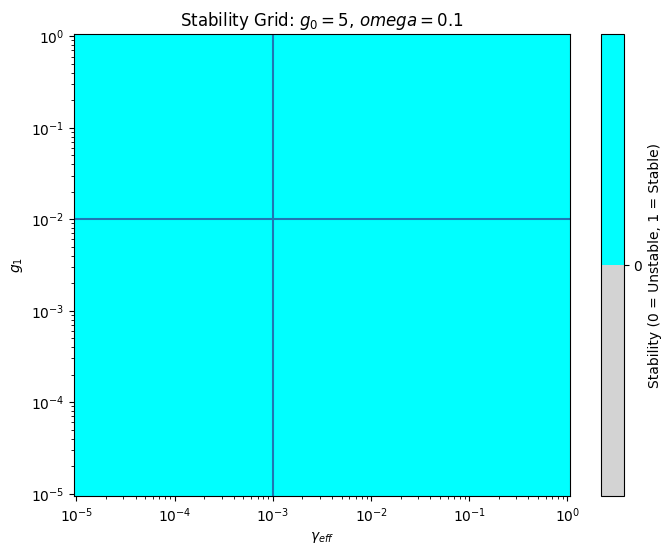

In [18]:
data = pd.read_csv('grid.txt', sep='\\s+', header=None, names=['g1', 'g', 'stable'])
data['stable'] = data['stable'].map({True: 1, False: 0})

# Swap 'g1' and 'g' to have 'gamma' values on the x-axis and 'g1' on the y-axis
grid = data.pivot(index='g1', columns='g', values='stable')
#print(grid.loc[0.01, 0.001])
figure(figsize=(8, 6))
custom_cmap = ListedColormap(['lightgray', (0.0, 1.0, 1.0)])

# Ensure 'grid.columns' (gamma values) are on the x-axis and 'grid.index' (g1 values) are on the y-axis
pcolormesh(grid.columns, grid.index, grid.values, cmap=custom_cmap, shading='auto')
colorbar(ticks=[0, 1], label='Stability (0 = Unstable, 1 = Stable)')

xlabel('$\\gamma_{eff}$')
ylabel('$g_{1}$')
axvline(x=0.001)
axhline(y=0.01)
title('Stability Grid: $g_{0}=5$, $omega=0.1$')
xscale('log')
yscale('log')

savefig("sbra.png", bbox_inches='tight')
show()
